
# The Iris Dataset

The Iris dataset is a classic and widely-used dataset in the field of machine learning and statistics. Collected by the British biologist and statistician Ronald A. Fisher in 1936, the dataset is named after the iris flower's genus. It consists of 150 samples, each belonging to one of three species of iris flowers: setosa, versicolor, and virginica.

## Dataset Details:
- **Features**: The dataset includes four features (attributes): sepal length, sepal width, petal length, and petal width, all measured in centimeters.
- **Target Variable**: The target variable is the species of iris, which is categorized into three classes: setosa, versicolor, and virginica.

<div style="display: flex; flex-direction: row;">
    <img src="images/setosa.jpg" alt="Image 1" style="flex: 1; margin: 5px; width: 100px;">
    <img src="images/versucolour.jpg" alt="Image 2" style="flex: 1; margin: 5px; width: 100px;">
    <img src="images/virginica.jpg" alt="Image 3" style="flex: 1; margin: 5px; width: 100px;">
</div>


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

# visualization
import matplotlib.pyplot as plt

# scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

### Loading our Dataset
- Number of Instances: 150 (50 of each class)
- Different Classes: Iris-Setosa, Iris-Versicolour, Iris-Virginica

### Number of Attributes: 4 (numeric)
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

In [7]:
from  sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

## Dataset Exploration

1. Explore information about the dataset
2. Check feature names and target names
3. Create a dataframe for easier visualization

In [8]:
# Display basic infornmation about the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
# Check feature names and target names
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
print(iris_df.head())

## Creating Training Testing Splits
- **test**: proportional size of holdout data for testing
- **random_state**: parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it. In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Training data x size: {x_train.size}')
print(f'Training data y size: {y_train.size}')
print(f'Test data x size: {x_test.size}')
print(f'Test data y size: {y_test.size}')

Training data x size: 480
Training data y size: 120
Test data x size: 120
Test data y size: 30


## Feature Standardization (beneficial for KNN)

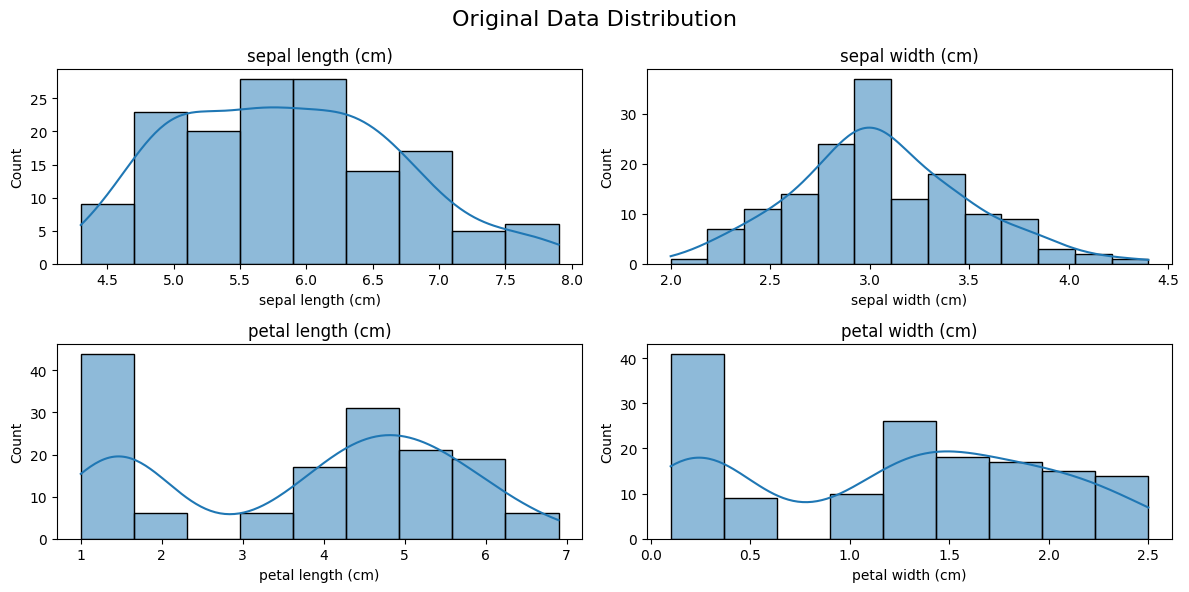

In [32]:
# Visualize the original data distribution
plt.figure(figsize=(12, 6))
plt.suptitle("Original Data Distribution", fontsize=16)

for i, feature in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris_df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


## Training our Model

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(x_test)

In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         9
           2       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30

Confusion Matrix:
[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]


/Users/vk64lk/Documents/github/iris-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vk64lk/Documents/github/iris-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vk64lk/Documents/github/iris-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

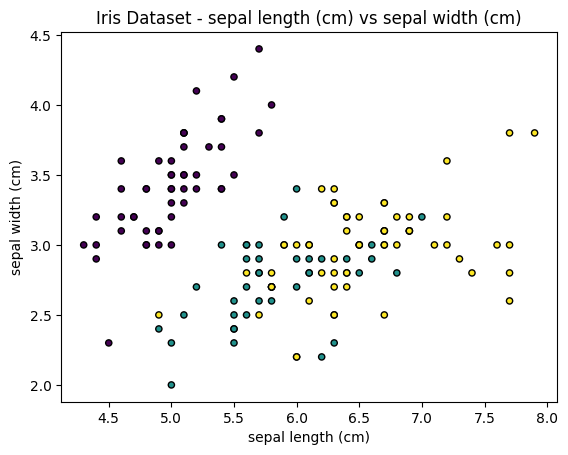

In [28]:
# Visualize the decision boundaries (for 2 features)
# Note: This is just for illustration and may not work well for datasets with more than two features.
feature1, feature2 = 0, 1  # Select two features for visualization
plt.scatter(x[:, feature1], x[:, feature2], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title(f"Iris Dataset - {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}")
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = x[:, feature1].min() - 1, x[:, feature1].max() + 1
y_min, y_max = x[:, feature2].min() - 1, x[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.show()
